# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
cat_col=["cut","color","clarity"]
num_col=["carat","depth","table","x","y","z"]

# Explotary Data Analysis

In [5]:
for i in cat_col:
    print("~"*100)
    print(train[i].value_counts())
    print("~"*100)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
train["carat"].value_counts()

0.30    10758
1.01    10103
0.31     9538
0.70     7958
0.32     7548
        ...  
2.72        1
3.40        1
3.50        1
2.71        1
1.96        1
Name: carat, Length: 248, dtype: int64

In [7]:
#Helper functions for plotting numerical columns and categorical columns
def bar_plot(col):
    plt.figure(figsize=(10,6))
    sns.countplot(x=train[col])
    plt.show
    
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=train, x=col)
    plt.show()

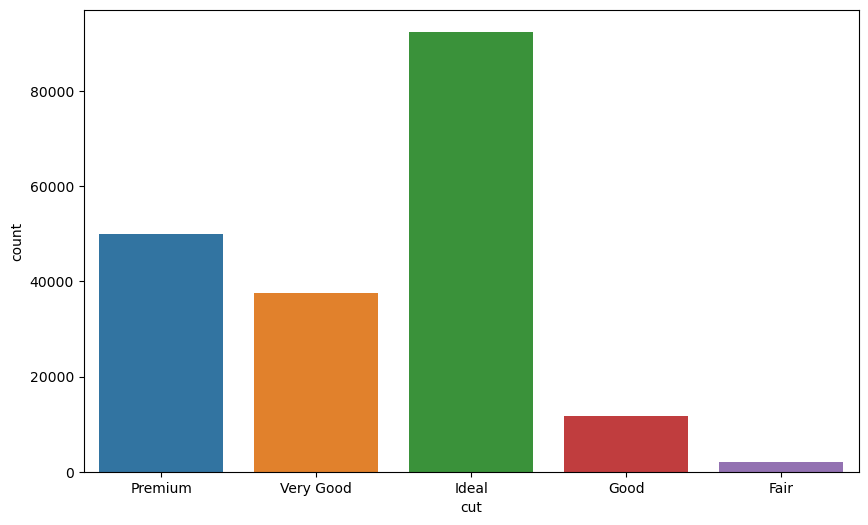

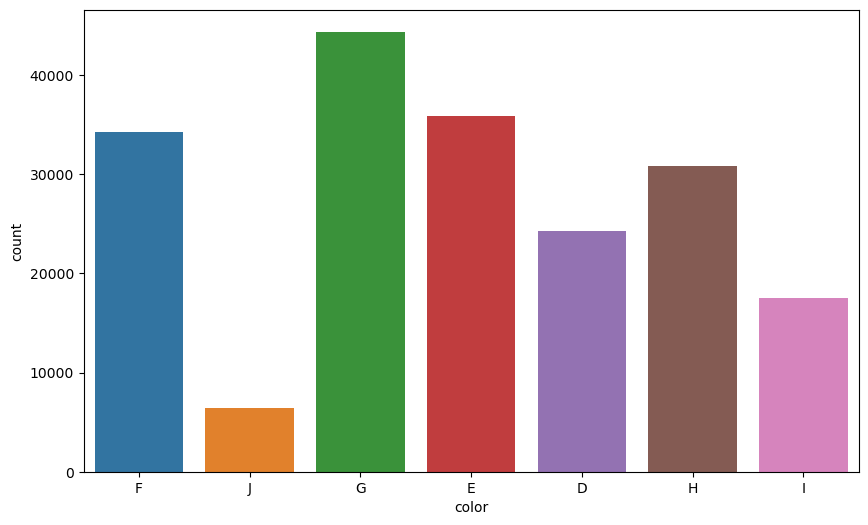

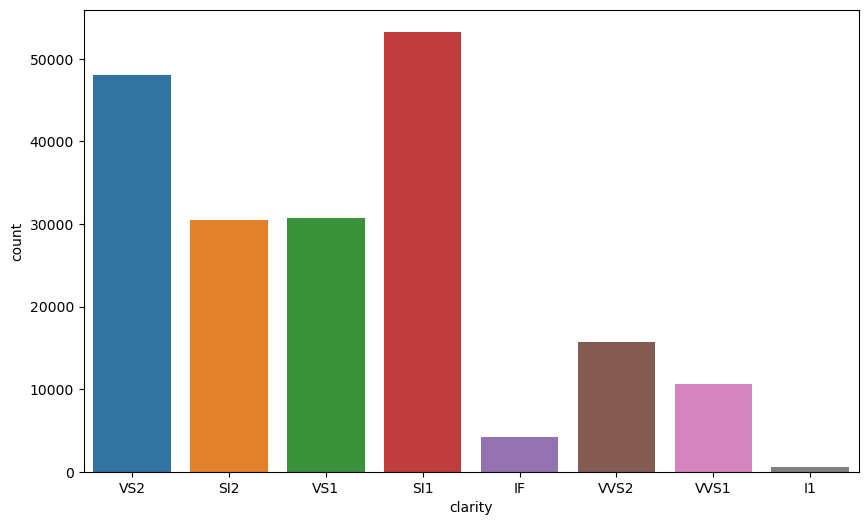

In [8]:
for i in cat_col:
    bar_plot(i)

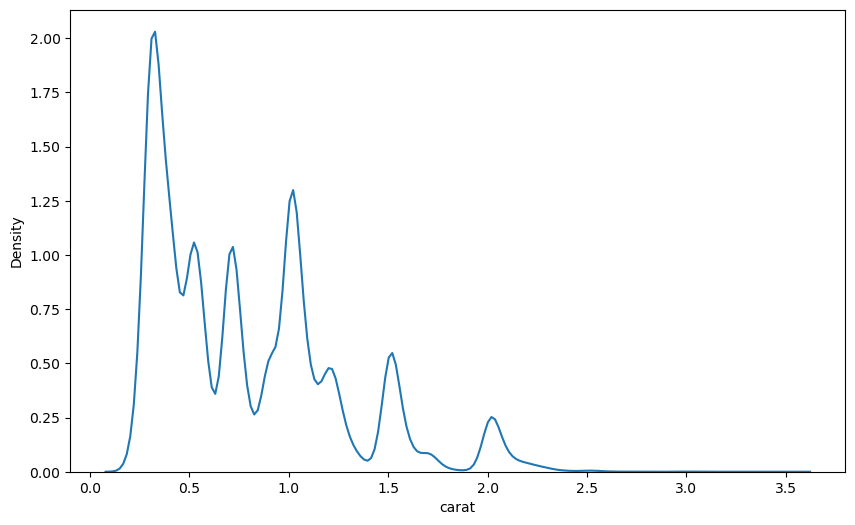

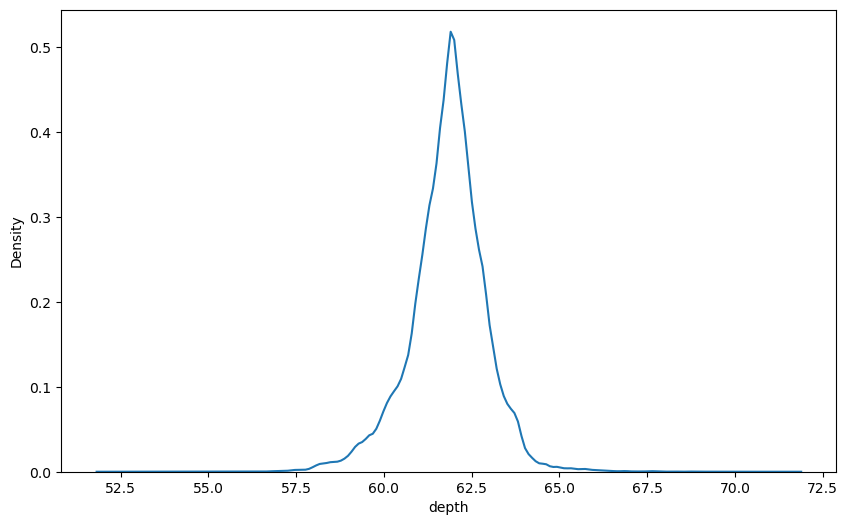

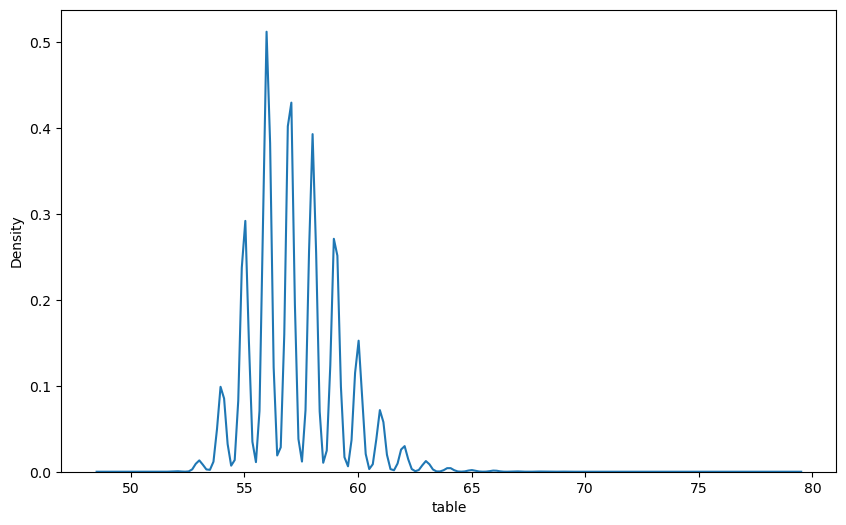

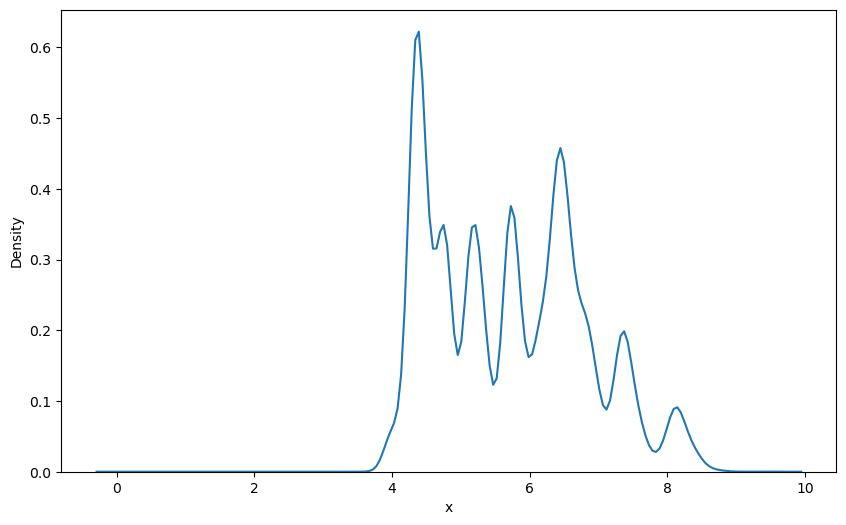

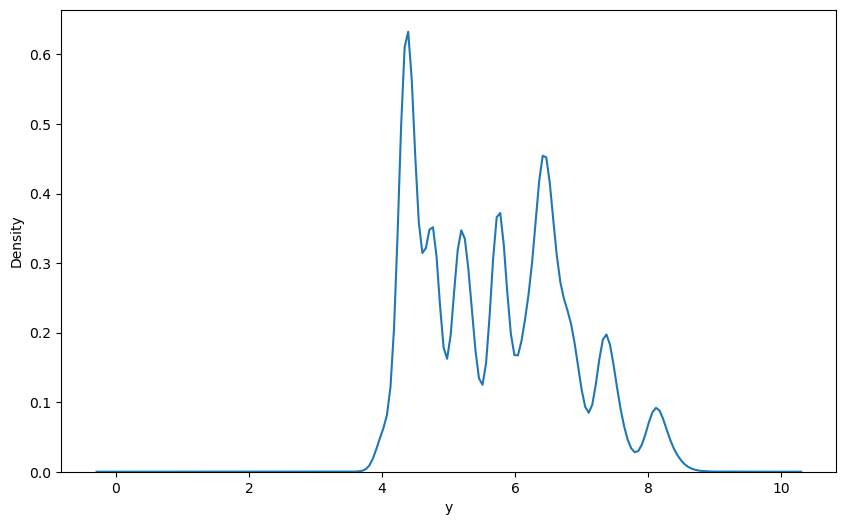

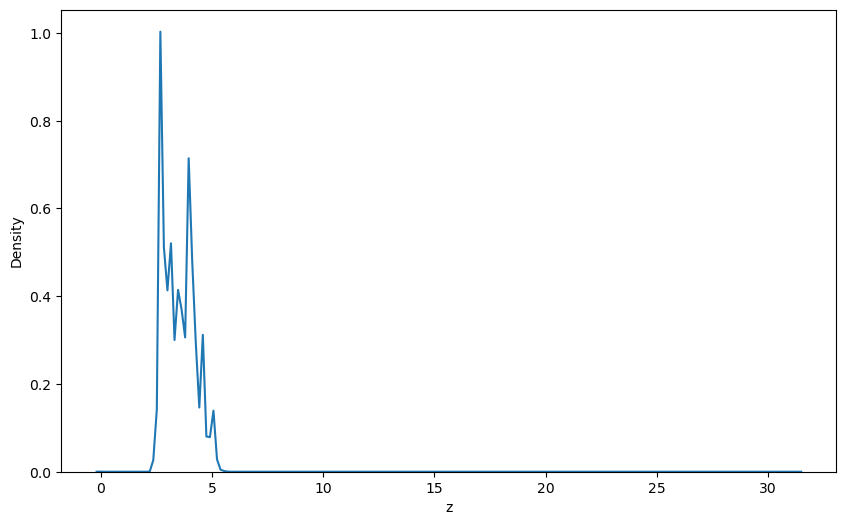

In [9]:
for i in num_col:
    kde_plot(i)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [12]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [13]:
test.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

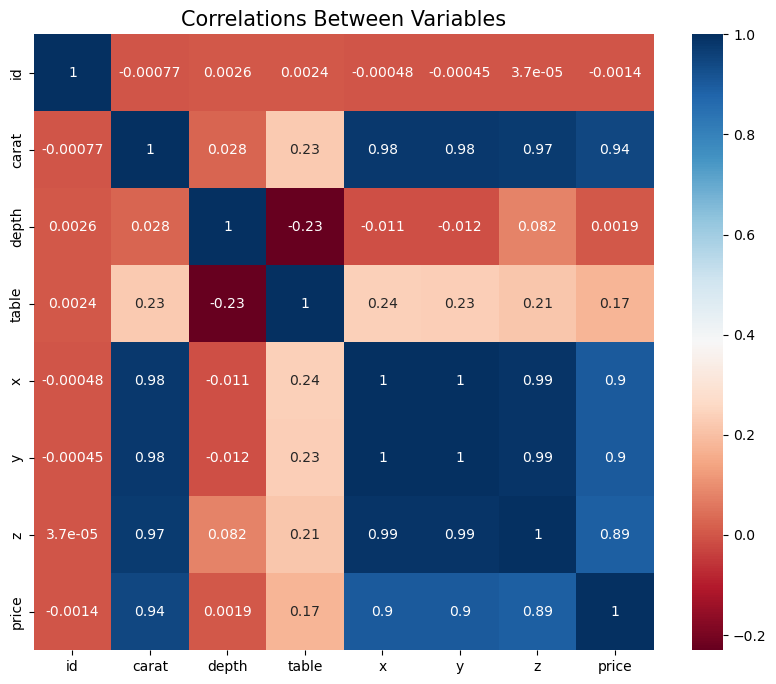

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [15]:
#train=train.reset_index()
train=train.drop("id",axis=1)

In [16]:
train

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


# Train_test split

In [17]:
x=train.drop("price",axis=1)
y=train["price"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for i in cat_col:
    X_train[i]=lr.fit_transform(X_train[i])
    X_test[i]=lr.fit_transform(X_test[i])

In [20]:
#x_train_cat=pd.get_dummies(X_train[cat_col])
#x_test_cat=pd.get_dummies(X_test[cat_col])

In [21]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
83475,0.32,3,1,2,61.6,58.0,4.38,4.41,2.71
160324,1.20,3,2,5,62.6,57.0,6.81,6.76,4.25
101740,1.50,2,5,5,62.2,55.0,7.30,7.26,4.53
180341,1.67,3,5,3,61.9,59.0,7.65,7.61,4.71
48480,1.00,1,4,5,63.7,60.0,6.34,6.30,4.02
...,...,...,...,...,...,...,...,...,...
119879,0.50,4,1,2,60.2,61.0,5.11,5.15,3.09
103694,1.91,4,2,2,62.3,62.0,7.85,7.79,4.87
131932,1.22,3,3,5,62.8,58.0,6.82,6.74,4.26
146867,0.31,4,3,6,61.1,56.0,4.37,4.40,2.67


# Model Building

In [22]:
#Define metrics i.e Mean squared error
from sklearn.metrics import mean_squared_error
def rmse(ytest,ypred):
    return np.sqrt(mean_squared_error(ytest,ypred))

In [23]:
model=Lasso()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print("~"*100)
print("rmse for train:",rmse(y_train,y_pred))
print("~"*100)
print("rmse for test:",rmse(y_test,y_test_pred))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rmse for train: 1112.5769212931
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rmse for test: 1100.9386348720811
